#                                 Project by : Dipanjan Dey Sarkar

# Objective :

Create a Decision Tree classifier to predict the class labels of the Iris dataset and visualize it graphically such that if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the csv file

data=pd.read_csv(r"C:\Users\Dipanjan Dey Sarkar\Downloads\Iris.csv")

In [3]:
#Printing the first five rows of the dataset

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Datatypes of the features present

data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#Summarizing the distribution of the dataset

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Checking for missing values in the dataset

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Dropping the duplicates in ID feature and viewing the shape of the dataset

data=data.drop_duplicates(subset='Id')
data.shape

(150, 6)

In [8]:
#Dropping the Id feature since there is no duplicate value in that column

data=data.drop(['Id'],axis=1)

In [9]:
#Counting the number of categories and its count in the Species feature

data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Observations:

1) There are 150 rows and 6 columns in the dataset.
2) There are no missing or duplicate values in the dataset.
3) The target variable consists of three categories : Virginica, Setosa and Versicolor 


# Univariate Analysis:


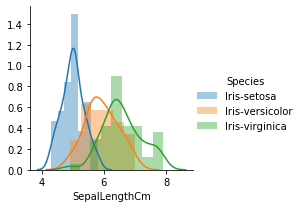

In [10]:
#Visualizing the density plot of the features with the target variable

sns.FacetGrid(data, hue="Species").map(sns.distplot, "SepalLengthCm").add_legend()
plt.show()

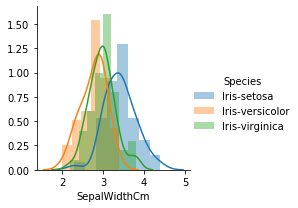

In [11]:
sns.FacetGrid(data, hue="Species").map(sns.distplot, "SepalWidthCm").add_legend()
plt.show()

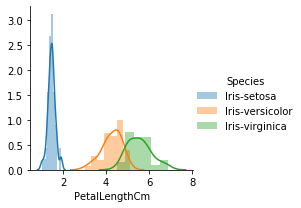

In [12]:
sns.FacetGrid(data, hue="Species").map(sns.distplot, "PetalLengthCm").add_legend()
plt.show()

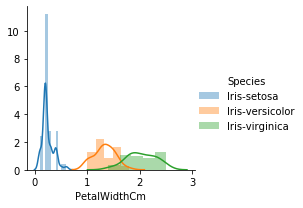

In [13]:
sns.FacetGrid(data, hue="Species").map(sns.distplot, "PetalWidthCm").add_legend()
plt.show()

# Bivariate Analysis:

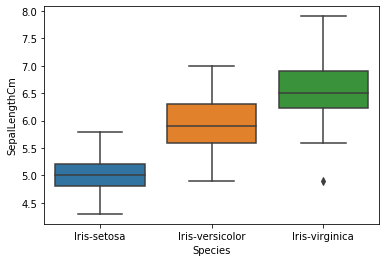

In [14]:
#Visualizing the boxplot of the features with the target variable

sns.boxplot(x='Species',y='SepalLengthCm', data=data)

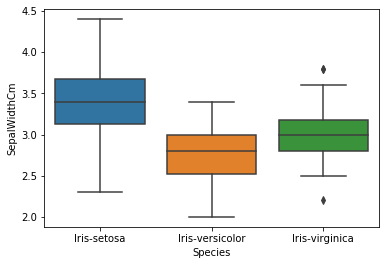

In [15]:
sns.boxplot(x='Species',y='SepalWidthCm', data=data)

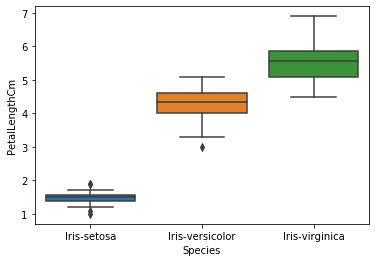

In [16]:
sns.boxplot(x='Species',y='PetalLengthCm', data=data)

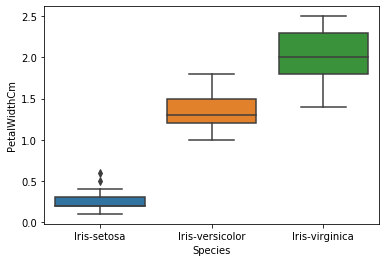

In [17]:
sns.boxplot(x='Species',y='PetalWidthCm', data=data)

# Multivariate Analysis:

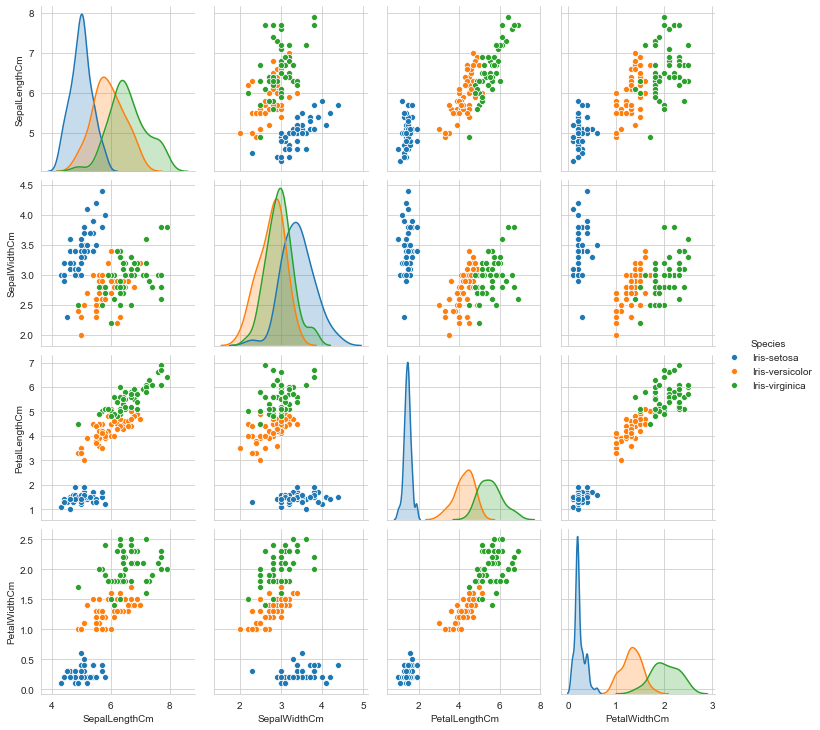

In [18]:
#Plotting a pairplot for observing the relationship between the features

sns.set_style('whitegrid')
sns.pairplot(data,hue='Species')

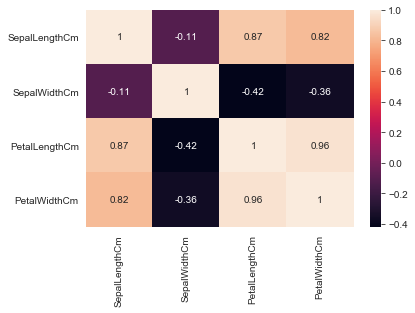

In [19]:
#Visualizing the correlation existing among the features

corr=data.corr()
sns.heatmap(corr,annot=True)

Observations:

1) Petal length and Petal width best seperates the datapoints.
2) Petal length and Petal width have the highest positive correlation between them.


# Modeling using Decision Tree Classifier:

In [20]:
#Storing the dependent and independent features in two different variables

X=data.drop(['Species'],axis=1)
Y=data['Species']

In [21]:
#Splitting the data into train and test dataset

X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [22]:
#Training the decision tree model and storing its predictions

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(x_test)


In [23]:
#Calculating the accuracy score and plotting the confusion matrix for seeing the performance of our model

acc=accuracy_score(y_test,y_pred)
print("Accuracy of Decision Tree Classifier:",acc*100)
c_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",c_matrix)

Accuracy of Decision Tree Classifier: 98.0
Confusion Matrix:
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


# Visualization of our model:

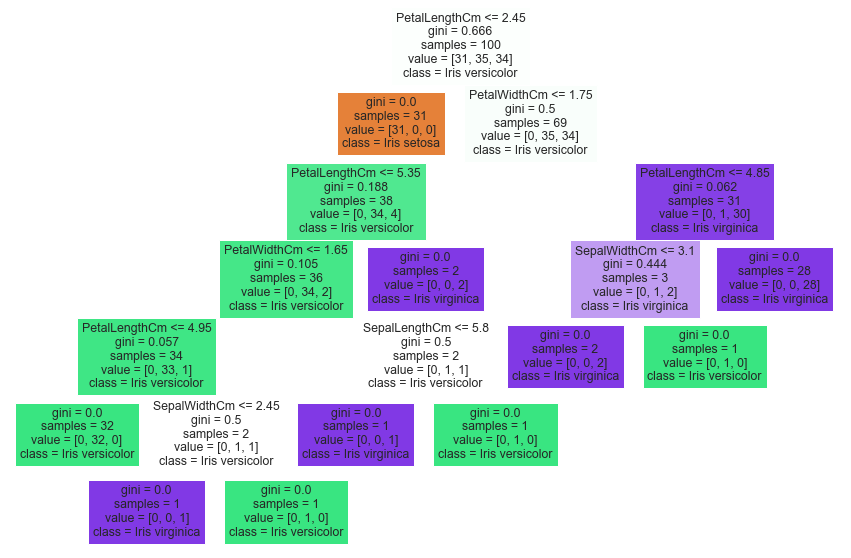

In [24]:
#Visualizing the graph of our decision tree model

class_names=['Iris setosa','Iris versicolor','Iris virginica']
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=X.columns,filled=True,class_names=class_names)
plt.show()

# Prediction on new data:

In [25]:
#Creating new datapoints on which the model's prediction is seen

new_data=[[6,2.7,5.1,1.6]]
model.predict(new_data)

array(['Iris-versicolor'], dtype=object)

Observations:

The accuracy score using Decision Tree classifier is 98%.
